In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install ipykernel


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
fertility = pd.read_csv("API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_37712.csv", skiprows=4)
gdp = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_122367.csv", skiprows=4)

In [13]:
print("✅ Fertility dataset shape:", fertility.shape)
print("✅ GDP dataset shape:", gdp.shape)

✅ Fertility dataset shape: (266, 70)
✅ GDP dataset shape: (266, 70)


In [14]:
year = "2010"

In [15]:
fertility_df = fertility[['Country Name', year]].rename(columns={year: 'Fertility_Rate'})
gdp_df = gdp[['Country Name', year]].rename(columns={year: 'GDP_per_Capita'})

In [16]:
df = pd.merge(fertility_df, gdp_df, on='Country Name')

In [17]:
df.dropna(inplace=True)

In [18]:
print(f" Cleaned dataset: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head())

 Cleaned dataset: 261 rows, 3 columns


,Country Name,Fertility_Rate,GDP_per_Capita
0,Aruba,1.855000,24093.140151
1,Africa Eastern and Southern,5.066497,1601.727651
2,Afghanistan,6.195000,560.621505
3,Africa Western and Central,5.712896,1663.966937
4,Angola,6.194000,3597.342932


In [19]:
print("\n DESCRIPTIVE STATISTICS:")
display(df.describe())


 DESCRIPTIVE STATISTICS:


,Fertility_Rate,GDP_per_Capita
count,261.000000,261.000000
mean,2.933635,15028.007246
std,1.474222,22601.264398
min,1.070000,216.727705
25%,1.799000,1663.966937
50%,2.396000,5418.216334
75%,3.879000,19847.231013
max,7.640000,161853.920622


In [20]:
print("\n Correlation between Fertility & GDP:")
print(df[['Fertility_Rate','GDP_per_Capita']].corr())


 Correlation between Fertility & GDP:
                Fertility_Rate  GDP_per_Capita
Fertility_Rate        1.000000       -0.437548
GDP_per_Capita       -0.437548        1.000000


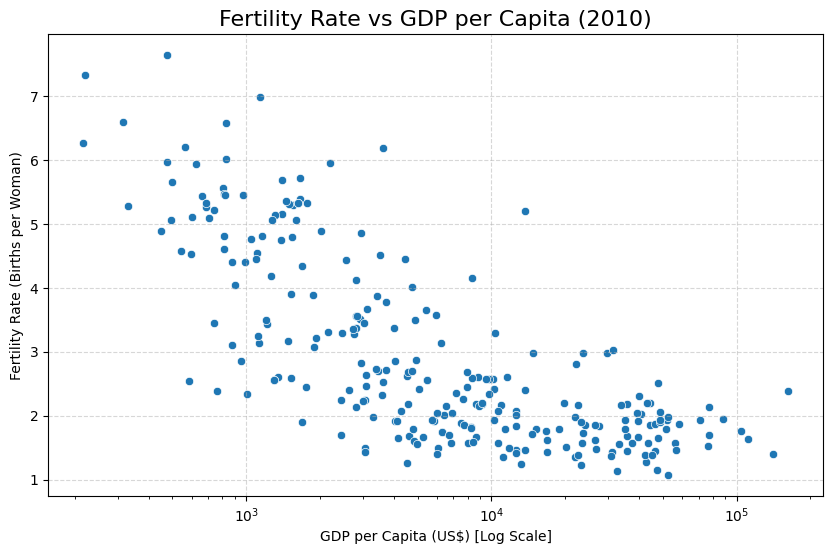

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GDP_per_Capita', y='Fertility_Rate', data=df)
plt.xscale('log')  # log scale helps spread the data
plt.title(f'Fertility Rate vs GDP per Capita ({year})', fontsize=16)
plt.xlabel('GDP per Capita (US$) [Log Scale]')
plt.ylabel('Fertility Rate (Births per Woman)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

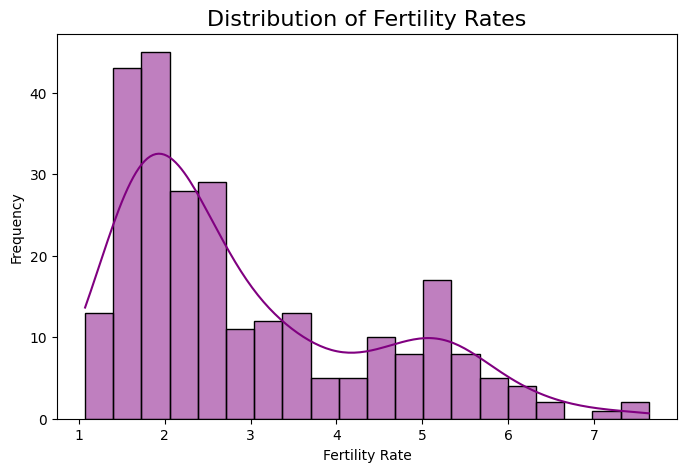

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fertility_Rate'], bins=20, kde=True, color='purple')
plt.title('Distribution of Fertility Rates', fontsize=16)
plt.xlabel('Fertility Rate')
plt.ylabel('Frequency')
plt.show()

In [23]:
X = df[['GDP_per_Capita']]
y = df['Fertility_Rate']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("\n MODEL PERFORMANCE:")
print(f" RMSE (Root Mean Square Error): {rmse:.3f}")
print(f" R² Score: {r2:.3f}")


 MODEL PERFORMANCE:
 RMSE (Root Mean Square Error): 1.354
 R² Score: 0.205


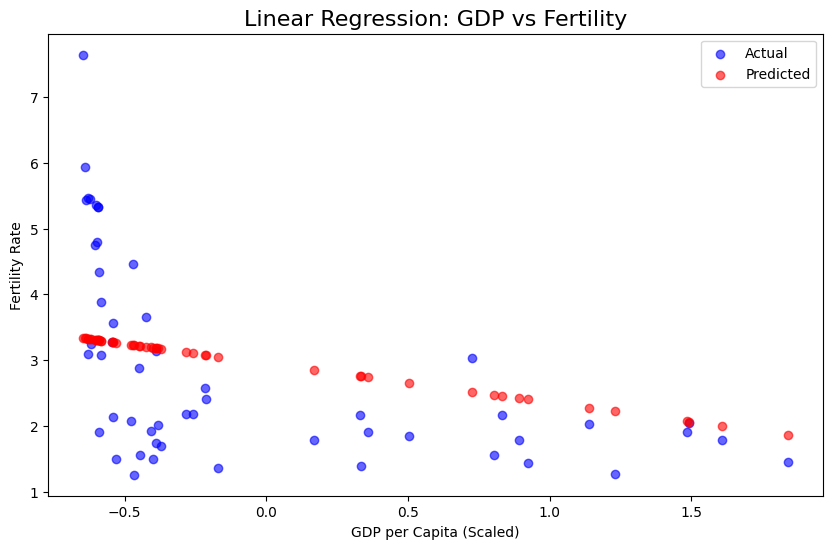

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('Linear Regression: GDP vs Fertility', fontsize=16)
plt.xlabel('GDP per Capita (Scaled)')
plt.ylabel('Fertility Rate')
plt.legend()
plt.show()

In [30]:
df.to_csv("cleaned_fertility_gdp.csv", index=False)

In [31]:
print(" Cleaned dataset saved as: cleaned_fertility_gdp.csv")

 Cleaned dataset saved as: cleaned_fertility_gdp.csv
